In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = {'actuals' :[1,0,1,1,0,1,0,1,0,1], 
      'predictions' :[1,0,1,1,1,1,1,1,1,0]}
df = pd.DataFrame(df)
print(df)

   actuals  predictions
0        1            1
1        0            0
2        1            1
3        1            1
4        0            1
5        1            1
6        0            1
7        1            1
8        0            1
9        1            0


In [7]:
df

,actuals,predictions
0,1,1
1,0,0
2,1,1
3,1,1
4,0,1
5,1,1
6,0,1
7,1,1
8,0,1
9,1,0


In [10]:
cf_matrix = confusion_matrix(df['actuals'] , df['predictions'])
print(cf_matrix)

[[1 3]
 [1 5]]


In [9]:
TP = ((df['actuals'] == 1) & (df['predictions'] == 1)).sum()
TN = ((df['actuals'] == 0) & (df['predictions'] == 0)).sum()
FP = ((df['actuals'] == 0) & ( df['predictions'] == 1)).sum()
FN = ((df['actuals'] == 1) & ( df['predictions'] == 0)).sum()
print(f'TP: {TP}, FP: {FP}')
print(f'FN: {FN}, TN: {TN}')

TP: 5, FP: 3
FN: 1, TN: 1


In [ ]:
sensitivity = TP/(TP+FN)
speficicity = TN/(TN+FP)
print(f'Sensitivity: {sensitivity}')
print(f'Speficicity: {speficicity}')


Sensitivity: 0.8333333333333334
Speficicity: 0.25


In [14]:
accuracy = (TP+TN) / (TP+TN+FP+FN)
precision = TP/(TP+FP)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

Accuracy: 0.6
Precision: 0.625


In [15]:
Fscore = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f'F-score: {Fscore}')
prevalence = (TP + FN) / (TP + TN + FP + FN)
print(f'Prevalence: {prevalence}')

F-score: 0.7142857142857143
Prevalence: 0.6


In [16]:
sensitivity * prevalence + speficicity * (1 - prevalence)

np.float64(0.6)

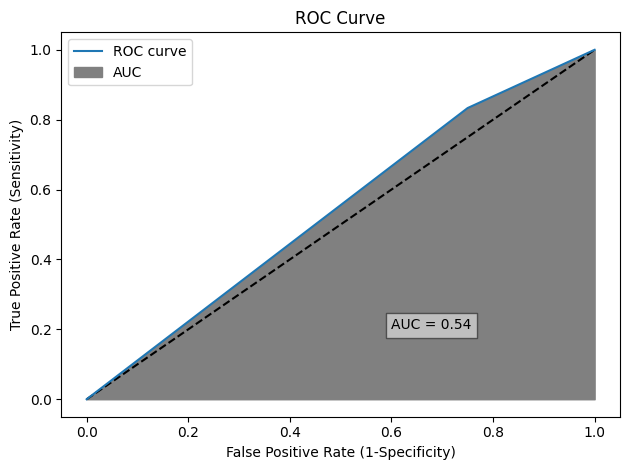

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(df['actuals'] , df['predictions'])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.text(0.6, 0.2, f'AUC = {roc_auc_score(df["actuals"] , df["predictions"]):.2f}', 
         bbox=dict(facecolor='white', alpha=0.5))
plt.fill_between(fpr, tpr, color = 'gray', label = 'AUC')
plt.tight_layout()
plt.legend()
plt.show()
